# 참조
- https://voxel51.com/docs/fiftyone/tutorials/evaluate_detections.html
- https://cocodataset.org/#download

In [2]:
!pip install pycocotools

  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.24-cp38-cp38-manylinux1_x86_64.whl (1.9 MB)
  Created wheel for pycocotools: filename=pycocotools-2.0.2-cp38-cp38-linux_x86_64.whl size=418548 sha256=cba41853bf73c07bf6ece5a94ac79e55791f6d6fe0e748455a2f321426aeb561
  Stored in directory: /root/.cache/pip/wheels/e7/77/b2/6f38b5bea571cd8f4689f91a7c1ed2eaecb2c2ce17f9945b17
Successfully built pycocotools


In [5]:
! python -m pip install -U scikit-image

     |████████████████████████████████| 30.2 MB 8.4 MB/s            
     |████████████████████████████████| 3.3 MB 8.5 MB/s            
     |████████████████████████████████| 178 kB 8.4 MB/s            
     |████████████████████████████████| 6.3 MB 8.4 MB/s            
     |████████████████████████████████| 1.9 MB 8.6 MB/s            


In [34]:
! pip install fiftyone

     |████████████████████████████████| 1.2 MB 5.3 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 29.2 MB 8.6 MB/s            
     |████████████████████████████████| 638 kB 8.4 MB/s            
     |████████████████████████████████| 55 kB 3.8 MB/s            
     |████████████████████████████████| 527 kB 8.5 MB/s            
     |████████████████████████████████| 131 kB 8.8 MB/s            
     |████████████████████████████████| 13.2 MB 9.9 MB/s            
     |████████████████████████████████| 106 kB 5.3 MB/s            
     |████████████████████████████████| 79.9 MB 9.7 MB/s            
     |████████████████████████████████| 557 kB 8.4 MB/s            
     |████████████████████████████████| 225 kB 8.4 MB/s            
     |████████████████████████████████| 47.6 MB 8.4 MB/s            
     |████████████████████████████████| 82 kB 1.1 MB/s             
     |████████████████████████████████| 77 kB 5.4 MB/s            
  Pre

In [6]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [9]:
dataDir='/data/cocodataset/val2017'
dataType='val2017'
annFile=f'{dataDir}/annotations/instances_{dataType}.json'

In [10]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.36s)
creating index...
index created!


The number of SuperCategroies: 12
<br>
The number of Categroies: 80

In [14]:
# display COCO categories and supercategories
nms = set([cat['supercategory'] for cat in cats])
print(f'The number of SuperCategroies: {len(nms)}')
print('COCO supercategories: \n{}'.format("\n".join(nms)))

cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print(f'The number of Categroies: {len(nms)}')
print('COCO categories: \n{}\n'.format("\n".join(nms)))



The number of SuperCategroies: 12
COCO supercategories: 
kitchen
indoor
furniture
food
vehicle
electronic
accessory
appliance
outdoor
animal
person
sports
The number of Categroies: 80
COCO categories: 
person
bicycle
car
motorcycle
airplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
couch
potted plant
bed
dining table
toilet
tv
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush



In [23]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']); # 파라미터에서 넘겨주는 (슈퍼)카테고리의 정보로 (슈펴)카테고리 ID를 알아낸다
imgIds_1 = coco.getImgIds(catIds=catIds ); #파라미터로 넘겨주는 카테고리 아이디를 가지고 있는 이미지 ID리스트를 불러온다. 예제는 3장
imgIds_2 = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds_2[np.random.randint(0,len(imgIds_2))])[0]

In [24]:
catIds

[1, 18, 41]

In [25]:
imgIds_1,imgIds_2 

([549220, 324158, 279278], [324158])

In [27]:
img

{'license': 1,
 'file_name': '000000324158.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg',
 'height': 334,
 'width': 500,
 'date_captured': '2013-11-19 23:54:06',
 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg',
 'id': 324158}

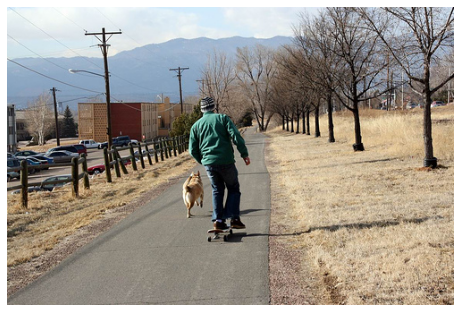

In [28]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

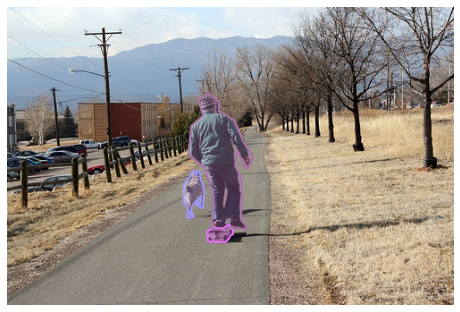

In [33]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [37]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.24s)
creating index...
index created!


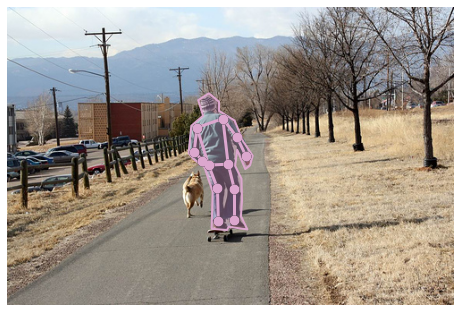

In [44]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [45]:
anns

[{'segmentation': [[228.43,
    247.9,
    229.63,
    206.62,
    224.24,
    191.07,
    220.65,
    179.7,
    207.49,
    169.53,
    202.71,
    163.55,
    205.7,
    133.04,
    218.86,
    121.68,
    213.47,
    104.33,
    225.44,
    96.55,
    236.8,
    106.12,
    236.8,
    116.29,
    254.15,
    127.06,
    263.72,
    150.39,
    274.49,
    166.54,
    271.5,
    177.31,
    266.12,
    181.5,
    257.14,
    159.96,
    254.75,
    177.91,
    261.93,
    192.27,
    262.53,
    216.79,
    261.33,
    234.14,
    268.51,
    249.1,
    247.57,
    246.11,
    245.78,
    249.69,
    229.03,
    248.5]],
  'num_keypoints': 12,
  'area': 5999.5445,
  'iscrowd': 0,
  'keypoints': [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   212,
   135,
   2,
   241,
   125,
   2,
   209,
   162,
   2,
   257,
   146,
   2,
   218,
   172,
   2,
   267,
   167,
   2,
   225,
   177,
   2,
   247,
   176,
   2,
   235,
   203,
   2,
   254,

In [10]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.13s)
creating index...
index created!


A man is skate boarding down a path and a dog is running by his side.
A man on a skateboard with a dog outside. 
A person riding a skate board with a dog following beside.
This man is riding a skateboard behind a dog.
A man walking his dog on a quiet country road.


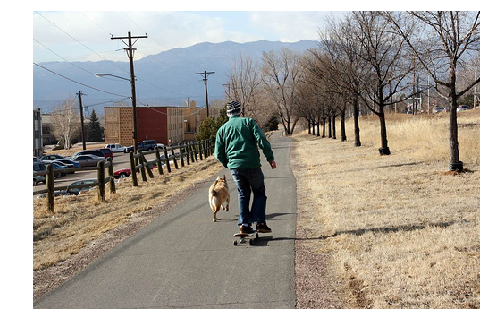

In [11]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()